This version uses one-hot encoding vectors of size 26 as the targets. This one overfits like crazy as well, but we will fix that! :D

### Install pytorch 

In [27]:
# use cross entropy for classification problems

import time
import platform
import io

import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.pyplot import cm 

# import KFold from scikit-learn
from sklearn.model_selection import KFold

def install_pytorch():
    os = platform.system()
    if os == "Linux":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
    elif os == "Windows":
        !pip3 install http://download.pytorch.org/whl/cu90/torch-0.4.0-cp36-cp36m-win_amd64.whl 
    !pip3 install torchvision


# Install PyTorch.
install_pytorch()


import torch
import torch.nn as nn
import torch.optim as optim

### Enable GPU Usage

Model trains much more quickly with GPU. 

In [0]:
# # turn on GPU
# use_gpu = torch.cuda.is_available()

# print("GPU Available: {}".format(use_gpu))

## Dataset

### Import and read the CSV file 

In [0]:
#import csv dataset
import torchvision
import csv
import os
import pandas as pd 
from urllib import request
import requests

# Upload and read the csv files from the github repo
df = pd.read_csv("https://raw.githubusercontent.com/HelenG123/aeye-alliance/master/Data/data_day3.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/HelenG123/ai-alliance/master/brailleFinalv2.csv")

### Generate the Targets
Create a dictionary that contains the one-hot encoding vector for each image in the Braille alphabet.


In [29]:
import string
alphabet = list(string.ascii_lowercase)

target = {}

# Initalize a target dict that has the letters as its keys and as its value
# an empty one-hot encoding of size 26
for letter in alphabet: 
  target[letter] = [0] * 26

# Do the one-hot encoding for each letter now 
curr_pos = 0 
for curr_letter in target.keys():
  target[curr_letter][curr_pos] = 1
  curr_pos += 1  

print(target)

{'a': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'b': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'c': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'd': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'e': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'f': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'g': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'h': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'i': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'j': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'k': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'l': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

### Iterate over the CSV files
Create a dictionary of the images that contains the image as a Tensor and its target as a one-hot encoded vector.

In [0]:
from scipy import misc
from io import BytesIO
import urllib
import cv2
import numpy as np
import tensorflow as tf

import urllib.request

from torchvision import transforms

data=[]

for i, row in df.iterrows():
  picture = []
  url = row['Labeled Data']
  label = row['Label']
  curr_target = target[label[10]]
  # print(curr_target)

  x = urllib.request.urlopen(url)
  resp = x.read()
  image = np.array(bytearray(resp), dtype=np.uint8)
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # resize image to 28x28x3
  image = cv2.resize(image, (28, 28))
  image = image.astype(np.float32)/255.0
   #image = image.flatten().astype(np.float32)/255.0
  image = torch.from_numpy(image)
  picture.append(image)
  curr_target=torch.LongTensor([curr_target])
  picture.append(curr_target)
  data.append(picture)

print(image.shape) # these are the dimensions of our image
print(data[0][0])
print(data[0][1])
# print(max([d[1] for d in data]))

data_test=[]

for i, row in df_test.iterrows():
  picture = []
  url = row['Labeled Data']
  label = row['External ID']
  curr_target = target[label[0]]
  # print(curr_target)

  x = urllib.request.urlopen(url)
  resp = x.read()
  image = np.array(bytearray(resp), dtype=np.uint8)
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # resize image to 28x28x3
  image = cv2.resize(image, (28, 28))
  image = image.astype(np.float32)/255.0
   #image = image.flatten().astype(np.float32)/255.0
  image = torch.from_numpy(image)
  picture.append(image)
  curr_target=torch.LongTensor([curr_target])
  picture.append(curr_target)
  data_test.append(picture)

torch.Size([28, 28, 3])
tensor([[[ 0.8745,  0.8314,  0.8157],
         [ 0.8745,  0.8275,  0.8157],
         [ 0.8745,  0.8275,  0.8196],
         ...,
         [ 0.8784,  0.8314,  0.8157],
         [ 0.8745,  0.8314,  0.8196],
         [ 0.8745,  0.8314,  0.8196]],

        [[ 0.8706,  0.8275,  0.8118],
         [ 0.8706,  0.8275,  0.8118],
         [ 0.8667,  0.8235,  0.8078],
         ...,
         [ 0.8824,  0.8353,  0.8196],
         [ 0.8745,  0.8275,  0.8196],
         [ 0.8706,  0.8235,  0.8157]],

        [[ 0.8745,  0.8314,  0.8157],
         [ 0.8745,  0.8314,  0.8157],
         [ 0.8706,  0.8275,  0.8118],
         ...,
         [ 0.8863,  0.8392,  0.8275],
         [ 0.8745,  0.8275,  0.8196],
         [ 0.8745,  0.8275,  0.8196]],

        ...,

        [[ 0.8706,  0.8314,  0.8039],
         [ 0.8824,  0.8431,  0.8157],
         [ 0.8784,  0.8392,  0.8118],
         ...,
         [ 0.8706,  0.8314,  0.8039],
         [ 0.8627,  0.8275,  0.8000],
         [ 0.8627,  0.8275

### Create DataLoader objects

Dataloader gives a the object that we can iterate over so that we can enumerate and train our data.

In [30]:
# batch sizes for train, test, and validation
batch_size_train = 10
batch_size_test = 5
batch_size_validation = 10

# splitting data to get training and validation sets
train_dataset = data[:600]
validation_dataset = data[601:]

# create the dataloader objects
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size_train, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size_validation, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=data_test, batch_size=batch_size_test, shuffle=False)

print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

60
9
16


### Visualize the Image
Demonstrate that we can access and display an image from the dataset. 


Braille Target: S/s


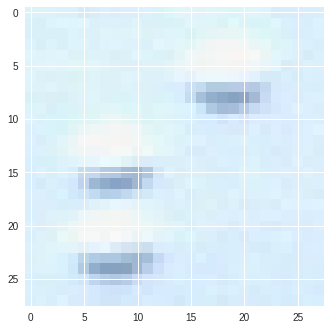

In [31]:
# Display 's' in Brailles
import matplotlib.pyplot as plt
import numpy as np
dd = data[250][0].numpy()
print('Braille Target: S/s')
plt.imshow(dd)
plt.show()


## CNN Model

### Define the Model

In [104]:
# import the nn.Module class
import torch.nn as nn

# defines the convolutional neural network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.block1 = nn.Sequential(
            #3x28x28
            nn.Conv2d(in_channels=3, 
                      out_channels=16, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2),
            #16x28x28
            nn.MaxPool2d(kernel_size=2),
            #16x14x14
            nn.LeakyReLU()
        )
        #16x14x14
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=16, 
                      out_channels=32, 
                      kernel_size=5, 
                      stride=1, 
                      padding=2),
            #32x14x14
            nn.MaxPool2d(kernel_size=2),
            #32x7x7
            nn.LeakyReLU()
        ) 
        # linearly 
        self.block3 = nn.Sequential(
            nn.Linear(32*7*7, 500),
#             nn.Linear(500, 300),
#             nn.Linear(300, 100),
            nn.LeakyReLU(),
            nn.Linear(500, 26)
        )
        
        #1x26
    
    def forward(self, x): 
        out = self.block1(x)
        out = self.block2(out)
        # flatten the dataset
        out = out.view(-1, 32*7*7)
        out = self.block3(out)
        
        return out

# convolutional neural network model
model = CNN()

# # if using GPU
# if use_gpu:
#   # switch model to GPU
#   model.cuda()

# print summary of the neural network model to check if everything is fine. 
print(model)
print("# parameter: ", sum([param.nelement() for param in model.parameters()]))

CNN(
  (block1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (block3): Sequential(
    (0): Linear(in_features=1568, out_features=500, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=500, out_features=26, bias=True)
  )
)
# parameter:  811574


### Set the learning rate, criterion, & optimizer

In [0]:
#setting the learning rate
learning_rate = 1e-3

# Using a variable to store the cross entropy method
criterion = nn.CrossEntropyLoss()

# Using a variable to store the optimizer 
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)


### Train and Evaluate the data

### Train the model on the train and validation sets

In [106]:
t0 = time.time()

# list of all train_losses in 30 epochs
train_losses = []
# list of all validation losses in 30 epochs
validation_losses = []

# total train losses
total_train_losses = []
# total validation losses
total_validation_losses = []

# for loop that iterates over all the epochs
num_epochs = 30
for epoch in range(num_epochs):
    
  # variables to store/keep track of the loss and number of iterations
  train_loss = 0
  num_iter_train = 0

  # train the model
  model.train()
    
  # Iterate over train_loader
  for i, (images, labels) in enumerate(train_loader):  
    # need to permute so that the images are of size 3x28x28 
    # essential to be able to feed images into the model
    images = images.permute(0, 3, 1, 2)

    # Zero the gradient buffer
    # resets the gradient after each epoch so that the gradients don't add up
    optimizer.zero_grad()  

    # Forward
    outputs = model(images)
    
    # convert the labels from one hot encoding vectors into integer values 
    labels = labels.view(-1, 26)
    y_true = torch.argmax(labels, 1)

    loss = criterion(outputs, y_true)
    
    #print('loss:', loss)
    total_train_losses.append(loss)
    # Backward (computes all the gradients)
    loss.backward()

    # Optimize
    # loops through all parameters and updates weights by using the gradients 
    # takes steps backwards to optimize (to reach the minimum weight)
    optimizer.step()
    # update the training loss and number of iterations
    train_loss += loss.data[0]
    num_iter_train += 1

  print('Epoch: {}, Training Loss: {:.4f}'.format(
        epoch+1, train_loss/num_iter_train))
  
  train_losses.append(train_loss/num_iter_train)
    
  # variables to store/keep track of the loss and number of iterations
  validation_loss = 0
  num_iter_validation = 0
    
  # Iterate over train_loader
  for i, (images, labels) in enumerate(validation_loader):  
    # need to permute so that the images are of size 3x28x28 
    # essential to be able to feed images into the model
    images = images.permute(0, 3, 1, 2)
    # print(images.shape)

    # Zero the gradient buffer
    # resets the gradient after each epoch so that the gradients don't add up
    optimizer.zero_grad()  

    # Forward
    outputs = model(images)

    # convert the labels from one hot encoding vectors to integer values
    labels = labels.view(-1, 26)
    y_true = torch.argmax(labels, 1)
    # calculate the loss
    loss = criterion(outputs, y_true)
    #print('loss:', loss)
    total_validation_losses.append(loss)

    # update the training loss and number of iterations
    validation_loss += loss.data[0]
    num_iter_validation += 1

  print('          Validation Loss: {:.4f}'.format(validation_loss/num_iter_validation))
  
  validation_losses.append(validation_loss/num_iter_validation)

# calculate time it took to train the model
tf = time.time()
print()
print("time: {} s" .format(tf-t0))

# print training loss and validation loss for all 30 epochs
print(train_losses)
print(validation_losses)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1, Training Loss: 3.2673
          Validation Loss: 3.2689


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2, Training Loss: 3.2596
          Validation Loss: 3.2692
Epoch: 3, Training Loss: 3.2561
          Validation Loss: 3.2832
Epoch: 4, Training Loss: 3.2582
          Validation Loss: 3.2674
Epoch: 5, Training Loss: 3.2562
          Validation Loss: 3.2875
Epoch: 6, Training Loss: 3.2551
          Validation Loss: 3.2861
Epoch: 7, Training Loss: 3.0832
          Validation Loss: 2.8428
Epoch: 8, Training Loss: 1.6946
          Validation Loss: 1.1828
Epoch: 9, Training Loss: 0.7736
          Validation Loss: 0.6198
Epoch: 10, Training Loss: 0.4145
          Validation Loss: 0.6035
Epoch: 11, Training Loss: 0.3860
          Validation Loss: 0.6037
Epoch: 12, Training Loss: 0.2681
          Validation Loss: 0.3538
Epoch: 13, Training Loss: 0.2023
          Validation Loss: 0.4670
Epoch: 14, Training Loss: 0.1764
          Validation Loss: 0.4508
Epoch: 15, Training Loss: 0.1485
          Validation Loss: 0.4639
Epoch: 16, Training Loss: 0.1354
          Validation Loss: 0.4898
Epo

### Plot the learning curve

The learning curve is the validation & train losses over the training steps. Need to plot the learning curve to check for overfitting. 

In [0]:
# learning curve function
def plot_learning_curve(train_losses, validation_losses):
  # plot the training and validation losses
  # x-axis is the number of training steps
  # y-axis is loss
  plt.ylabel('Loss')
  plt.xlabel('Number of Epochs')
  plt.plot(train_losses, label="training")
  plt.plot(validation_losses, label="validation")
  plt.legend(loc=1)

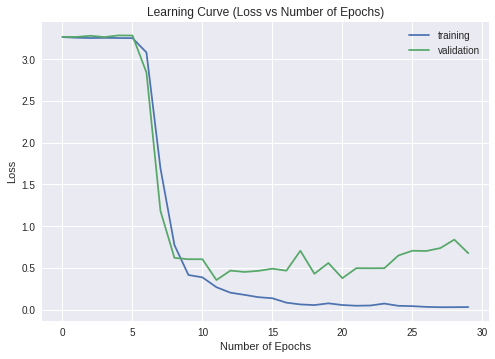

In [108]:
# plot
plt.title("Learning Curve (Loss vs Number of Epochs)")
plot_learning_curve(train_losses, validation_losses)

### Evaluate the model on the test set

Don't touch the test set until the very end.

In [109]:
t0 = time.time()

# for loop that iterates over all the epochs
num_epochs = 30
for epoch in range(num_epochs):

  # evaluate the model
  model.eval()

  correct = 0
  total = 0

  # Iterate over test_loader
  for images, labels in test_loader:  

     # need to permute so that the images are of size 3x28x28 
     # essential to be able to feed images into the model
     images = images.permute(0, 3, 1, 2)

     # Forward
     outputs = model(images)
      
     # convert the labels from one hot encoding vectors into integer values 
     labels = labels.view(-1, 26)
     y_true = torch.argmax(labels, 1)
     loss = criterion(outputs, y_true)
     
     # find the index of the prediction
     y_pred = torch.argmax(outputs, 1).type('torch.FloatTensor')
    
     y_true = y_true.type('torch.FloatTensor')
     #print(torch.eq(y_true, y_pred))
    
     mean = torch.mean(torch.eq(y_true, y_pred).type('torch.FloatTensor'))

     # Statistics
     total_correct = mean * batch_size_test
     

  print('Epoch {}, Accuracy on the test set: {}%'.format(epoch+1, 100 * total_correct / batch_size_test))

tf = time.time()
print()
print("time: {} s" .format(tf-t0))

Epoch 1, Accuracy on the test set: 100.0%
Epoch 2, Accuracy on the test set: 100.0%
Epoch 3, Accuracy on the test set: 100.0%
Epoch 4, Accuracy on the test set: 100.0%
Epoch 5, Accuracy on the test set: 100.0%
Epoch 6, Accuracy on the test set: 100.0%
Epoch 7, Accuracy on the test set: 100.0%
Epoch 8, Accuracy on the test set: 100.0%
Epoch 9, Accuracy on the test set: 100.0%
Epoch 10, Accuracy on the test set: 100.0%
Epoch 11, Accuracy on the test set: 100.0%
Epoch 12, Accuracy on the test set: 100.0%
Epoch 13, Accuracy on the test set: 100.0%
Epoch 14, Accuracy on the test set: 100.0%
Epoch 15, Accuracy on the test set: 100.0%
Epoch 16, Accuracy on the test set: 100.0%
Epoch 17, Accuracy on the test set: 100.0%
Epoch 18, Accuracy on the test set: 100.0%
Epoch 19, Accuracy on the test set: 100.0%
Epoch 20, Accuracy on the test set: 100.0%
Epoch 21, Accuracy on the test set: 100.0%
Epoch 22, Accuracy on the test set: 100.0%
Epoch 23, Accuracy on the test set: 100.0%
Epoch 24, Accuracy o